In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# NSL_5

In this notebook, the Metropolis algorithm is exploited to calculate the integral for the average position of an electron in an hydrogen atom for two different wavefunctions.

### EX05_1

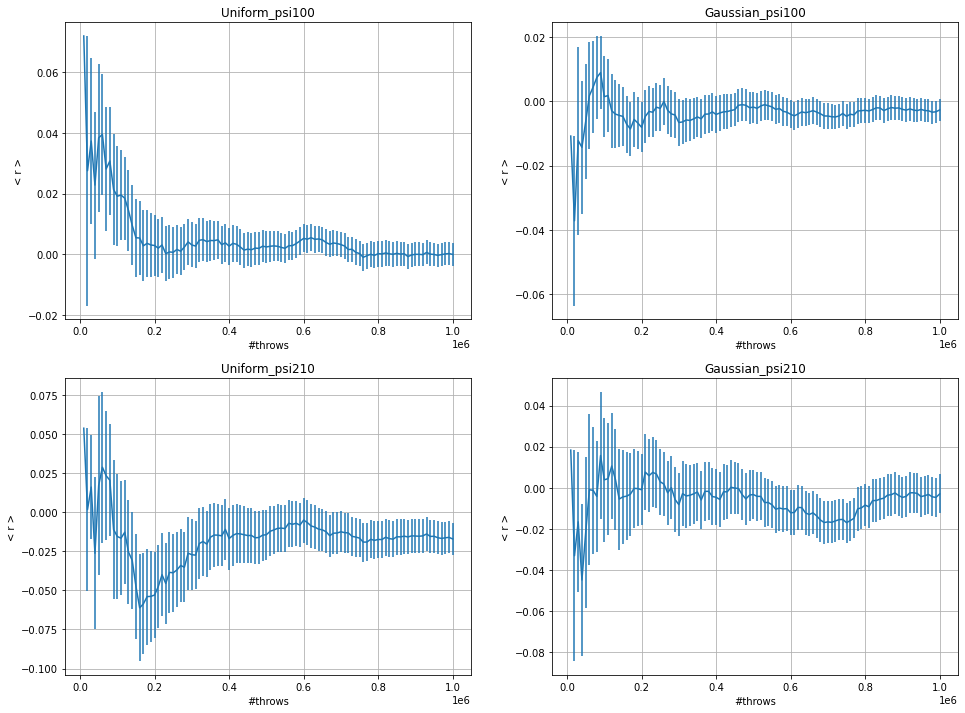

In [9]:
#starting from x=0;y=o;z=0
x, unifpsi100, err_unifpsi100, gausspsi100, err_gausspsi100, unifpsi210, err_unifpsi210, gausspsi210, err_gausspsi210 = np.loadtxt("results/es05_1.txt", usecols=(0,1,2,3,4,5,6,7,8), delimiter=' ', unpack='true')
val = [unifpsi100, gausspsi100, unifpsi210, gausspsi210]
err = [err_unifpsi100, err_gausspsi100, err_unifpsi210, err_gausspsi210]
titles = ['Uniform_psi100','Gaussian_psi100','Uniform_psi210','Gaussian_psi210']
exp = [3./2.,3./2.,5.,5.]

fig, axx = plt.subplots(2, 2,figsize=(16, 12))
axx = axx.reshape(-1)

for k in range(4):
    ax = axx[k]
    ax.errorbar(x, val[k]-exp[k],err[k])
    ax.set_title(titles[k])
    ax.set_xlabel(f"#throws")
    ax.set_ylabel(r"< r >")
    ax.grid(True)

Here are the graphs showing the convergence of the Metropolis algorithm. They shows the mean value of $r$ of the pdf derived from these two hydrogen wave functions:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
\qquad
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
It is computed with two different type of steps: uniform and gaussian. The lengths of the steps were accurately chosen in order to obtain an empirical acceptance rate of around $0.5$. In this simulation I used the following values:
- Uniform $\psi_{100}$: 1.25
- Gaussian $\psi_{100}$: 0.75
- Uniform $\psi_{210}$: 3
- Gaussian $\psi_{210}$: 1.9

The origin of the coordinate system was chosen as the starting point for the algorithm because it was not too far from the expected mean value. The parameters chosen in the blocking method were $M=10^6$ for the total number of throws and $N=100$ for the number of blocks.

As it can be seen from the graphs, all the methods used are compatible (distance in terms of $\sigma$ less than  $2$) with the expected analytical values. The gaussian step simulation converges more rapidly than the one with the uniform step only in the case of $\psi_{210}$ ending closer to the expected value. Another difference is that uncertainties are slightly reduced (look at the txt file). 

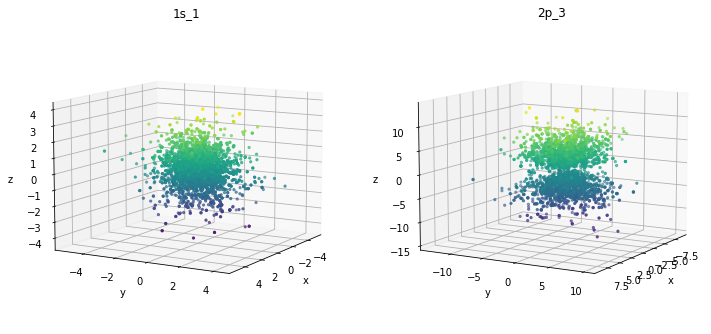

In [10]:
filenames = ["results/UnifPsi100.txt", "results/UnifPsi210.txt"]
titles = ["1s_1", "2p_3"]
fig = plt.figure(figsize=(12,12))

for i in range(2):
    ax = fig.add_subplot(1, 2, i+1, projection='3d')
    #axx[i] = Axes3D(fig)
    X, Y, Z = np.loadtxt(filenames[i], usecols=(0,1,2), unpack = True)
    #ax = Axes3D(axx[i])
    ax.scatter(X, Y, Z, c=Z, marker='.')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(10, 30)
    ax.set_title(titles[i])


Here we can see the two orbitals. These graphs are obtained by saving the position of the MCMC every ~$500$ steps. It can be seen that the first graph corresponds to a $1s$ orbital because of the spherical simmetry. On the other hand, the second plot is the $2p_z$ orbital bcause it is simmetric in respect of the $xy$ plane.

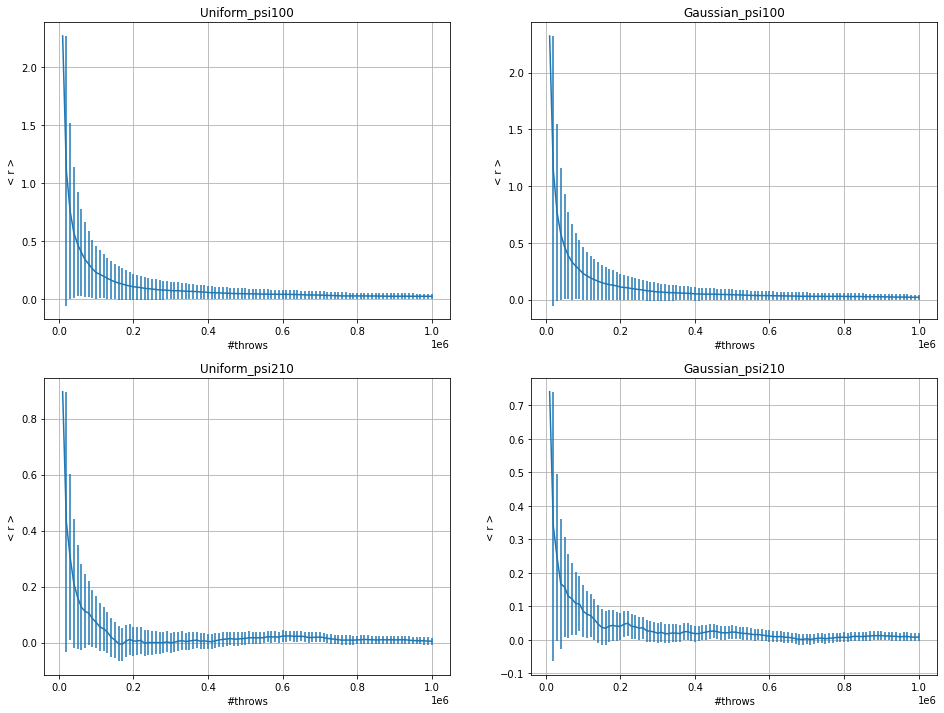

In [8]:
# Starting from x=100,y=0,z=0
x, unifpsi100, err_unifpsi100, gausspsi100, err_gausspsi100, unifpsi210, err_unifpsi210, gausspsi210, err_gausspsi210 = np.loadtxt("away100.0.0.txt", usecols=(0,1,2,3,4,5,6,7,8), delimiter=' ', unpack='true')
val = [unifpsi100, gausspsi100, unifpsi210, gausspsi210]
err = [err_unifpsi100, err_gausspsi100, err_unifpsi210, err_gausspsi210]
titles = ['Uniform_psi100','Gaussian_psi100','Uniform_psi210','Gaussian_psi210']
exp = [3./2.,3./2.,5.,5.]

fig, axx = plt.subplots(2, 2,figsize=(16, 12))
axx = axx.reshape(-1)

for k in range(4):
    ax = axx[k]
    ax.errorbar(x, val[k]-exp[k],err[k])
    ax.set_title(titles[k])
    ax.set_xlabel(f"#throws")
    ax.set_ylabel(r"< r >")
    ax.grid(True)

Finally, here are the graphs for the Metropolis algorithm starting from $(x=100,y=0,z=0)$ using the same methods as before. There are two intresting features:
- the algorithm still converges to the expected values
- the uncertainties are much more elevated